<a href="https://colab.research.google.com/github/vijayshankarrealdeal/desktopFiles/blob/main/LinearR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

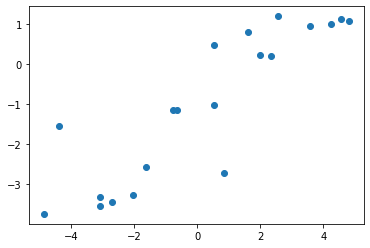

In [61]:
N = 20
X = np.random.random(N)*10 -5
Y = 0.5*X - 1 + np.random.randn(N)
plt.scatter(X,Y)

In [62]:
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [63]:
X.shape

(20, 1)

In [65]:
input = torch.from_numpy(X.astype(np.float32))
target = torch.from_numpy(Y.astype(np.float32))

In [66]:
criterion = torch.nn.MSELoss()
model = nn.Linear(1,1)
optim = torch.optim.SGD(model.parameters(),lr = 0.01)

In [67]:
n_epochs = 30
losses = []
for epoch in range(n_epochs):
  optim.zero_grad()
  output = model(input)
  loss = criterion(output,target)
  print(loss.item())
  losses.append(loss)
  loss.backward()
  optim.step()



5.133526802062988
4.122542858123779
3.414508819580078
2.914961338043213
2.5590450763702393
2.302224636077881
2.1139118671417236
1.9730939865112305
1.8653290271759033
1.7806875705718994
1.7123371362686157
1.6555713415145874
1.6071445941925049
1.5648133754730225
1.5270239114761353
1.4926947355270386
1.461071252822876
1.4316219091415405
1.4039690494537354
1.3778419494628906
1.3530433177947998
1.3294267654418945
1.3068803548812866
1.285318374633789
1.2646713256835938
1.2448819875717163
1.2259026765823364
1.2076913118362427
1.1902110576629639
1.1734286546707153


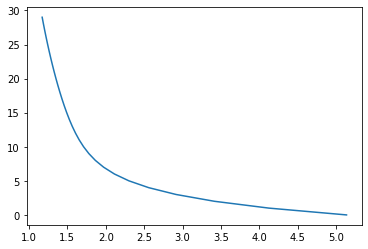

In [68]:
plt.plot(losses,range(n_epochs))

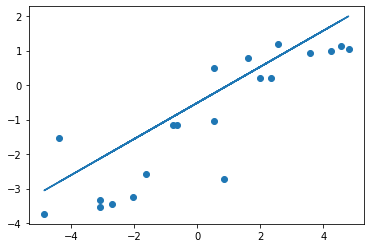

In [70]:
pred = model(input).detach().numpy()
plt.scatter(X,Y)
plt.plot(X,pred)
plt.show()

In [71]:
with torch.no_grad():
  out = model(input).numpy()
out

array([[ 1.3607383 ],
       [ 0.8277542 ],
       [-0.23491469],
       [-2.125862  ],
       [ 1.8691969 ],
       [ 0.5202959 ],
       [-0.91080546],
       [ 1.9955988 ],
       [-0.07582337],
       [-1.9270515 ],
       [-2.8035915 ],
       [ 0.7146743 ],
       [ 0.32349163],
       [-3.0576801 ],
       [-1.3750827 ],
       [-0.2354241 ],
       [-2.1308463 ],
       [ 1.7092798 ],
       [-1.5836644 ],
       [-0.84622097]], dtype=float32)

In [72]:
W,b = model.weight.data.numpy(),model.bias.data.numpy()

In [73]:
W,b

(array([[0.52341676]], dtype=float32), array([-0.51788205], dtype=float32))

In [74]:
df = pd.read_csv('train.csv')

In [77]:
df = df.fillna(value=df.mean())

In [79]:
X_train = df.x.values
y_train = df.y.values

In [81]:
X_train = X_train.reshape(X_train.shape[0],1)
y_train = y_train.reshape(y_train.shape[0],1)

In [82]:
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

In [ ]:
loss__ = []
for e in range(n_epochs):
  optim.zero_grad()
  output = model(X_train)
  loss = criterion(output,y_train)
  loss.backward()
  print(loss.item())
  loss__.append(loss)
  optim.step()